In [1]:
import os
os.chdir('/home/149/ab8992/cosima_regional/development/regional-mom6')
# from recipes import surfacespeed
from importlib import reload
# from ttidelib import logmsg
import shutil
import subprocess
import dask
import xarray as xr
from matplotlib import pyplot as plt
from dask.distributed import Client, default_client
from pathlib import Path
import sys
import regional_mom6 as rm
os.chdir('/home/149/ab8992/tasman-tides')

import ttidelib as tt

I think there are outputs now that have messed up y chunking from where I redit it.

In [2]:
from recipes import qsub

In [5]:
import glob
def check_outputs(expt,rerun = True):
    print(expt,end = "\n\n")
    if "40" in expt:
        no = 34    
    elif "10" in expt:
        no = 10
    else:
        no = 17

    dirs = os.listdir(f"/g/data/nm03/ab8992/outputs/{expt}")
    vars = ["ahh","v","u","e","rho"]
    # tell me how many files in each directory
    # print(dirs)
    for dir in dirs:
        if dir[0] != "o":
            continue

        bad = False
        for var in vars:
            # print(len(os.listdir(f"/g/data/nm03/ab8992/outputs/{expt}/" + dir + "/" + var)))
            if not os.path.exists(f"/g/data/nm03/ab8992/outputs/{expt}/" + dir + "/" + var):

                bad = True
            if os.path.exists(f"/g/data/nm03/ab8992/outputs/{expt}/" + dir + "/" + var) and len(glob.glob(f"/g/data/nm03/ab8992/outputs/{expt}/" + dir + "/" + var + "/*.nc")) != no:
                
                bad = True

                
        if bad:
            print("\t" + dir,end = "\n")
            if rerun:
                subprocess.run(
                        f"python3 recipes.py -r postprocess -e {expt} -o {int(dir.split('output')[-1])} & ",
                        shell=True,
                        text=True,
                        cwd = f"/home/149/ab8992/tasman-tides",
                        )
    print()

# check("notide-40")
# print("full-20")
# check("full-20")
# print()
# print("notide-20")
# check("notide-20")
# print()

check_outputs("smooth-40",rerun = True)
check_outputs("smooth-20",rerun = True)

check_outputs("beamless-40",rerun = True)
check_outputs("beamless-20",rerun = True)

check_outputs("smooth-10",rerun = True)
check_outputs("beamless-10",rerun = True)
check_outputs("full-10",rerun = True)


smooth-40

	output035
	output036
	output040
	output041
	output037
	output038
	output031

smooth-20


beamless-40

	output014
	output015
	output013
	output029
	output020
	output028
	output023
	output018
	output026
	output025

beamless-20

	output049

smooth-10


beamless-10

	output060

full-10




In [37]:
check_outputs("smooth-40",rerun = False)
check_outputs("smooth-20",rerun = False)

check_outputs("beamless-40",rerun = False)
check_outputs("beamless-20",rerun = False)

smooth-40


smooth-20

	output081
	output080

beamless-40

	output008
	output003

beamless-20




In [9]:
expt = "smooth-20"

len(glob.glob(f"/g/data/nm03/ab8992/outputs/{expt}/" + dir + "/" + var + "/*.nc"))

TypeError: can only concatenate str (not "builtin_function_or_method") to str

In [6]:
## Parse the eddy times, see which ones still need running / re-running
import yaml
def check_lfiltered(expt):
    with open("EddyTimes.yml", 'r') as file:
        eddytimes = yaml.safe_load(file)[expt]

    for t0 in eddytimes["eddy"] + eddytimes["noeddy"]:
        print(t0)
        path = Path(f"/g/data/nm03/ab8992/postprocessed/{expt}/lfiltered/t0-{t0}")
        complete = True
        for i in range(10):
            if not (path / f"FastFilter{i}.nc").exists():
                print("FastFilter",i,"missing")

                complete = False

        if not complete:
            print(expt + " incomplete")
            subprocess.run(
                f"bash lfilter.sh -e {expt} -t {t0} &",
                shell=True,
                text=True,
                cwd = f"/home/149/ab8992/tasman-tides",
            )
        else:
            print(expt + " complete")


# check_lfiltered("full-20")
check_lfiltered("full-40")

17359
full-40 complete
5440
FastFilter 0 missing
FastFilter 1 missing
FastFilter 2 missing
FastFilter 3 missing
FastFilter 4 missing
FastFilter 5 missing
FastFilter 6 missing
FastFilter 7 missing
FastFilter 8 missing
FastFilter 9 missing
full-40 incomplete
2460
FastFilter 1 missing
FastFilter 2 missing
FastFilter 3 missing
FastFilter 5 missing
FastFilter 7 missing
FastFilter 9 missing
full-40 incomplete
22276
FastFilter 0 missing
FastFilter 1 missing
FastFilter 2 missing
FastFilter 4 missing
FastFilter 5 missing
FastFilter 7 missing
FastFilter 9 missing
full-40 incomplete
27044
FastFilter 0 missing
FastFilter 2 missing
FastFilter 3 missing
FastFilter 5 missing
full-40 incomplete
6480
FastFilter 0 missing
FastFilter 1 missing
FastFilter 2 missing
FastFilter 3 missing
FastFilter 4 missing
FastFilter 5 missing
FastFilter 6 missing
FastFilter 7 missing
FastFilter 8 missing
FastFilter 9 missing
full-40 incomplete


Running vmodes
Running vmodes
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter0.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter1.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter2.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter3.nc
File /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-2460/FastFilter0.nc exists.
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter4.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-2460/FastFilter1.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter5.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-2460/FastFilter2.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-5440/FastFilter6.nc
filtering /g/data/nm03/ab8992/postprocessed/full-40/lfiltered/t0-2460/FastFilter3.nc
filtering /g/data/nm03/ab8992/po

lfilter.sh: line 17: tvalue: command not found
lfilter.sh: line 17: tvalue: command not found
lfilter.sh: line 17: tvalue: command not found
lfilter.sh: line 17: tvalue: command not found
lfilter.sh: line 17: tvalue: command not found


In [9]:
def fix(expt,output):
    base = Path("/g/data/nm03/ab8992/outputs")
    vars = ["ahh","v","u","e","rho"]
    # vars = ["v","u","e","rho"]
    
    for var in vars:
        # data = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/{expt}/" + output + "/" + var + "/*.nc")
        if not os.path.exists(base / expt / output / var/"backup"):
            subprocess.run(f"mkdir {base / expt / output / var}/backup",shell = True)
            subprocess.run(f"mv {base / expt / output /var}/*.nc {base / expt / output / var }/backup",shell = True)
        print(var)
        data = xr.open_mfdataset(str(base / expt / output / var /"backup") + "/*.nc",chunks = {"zl":50})
        tt.save_chunked(data,var,6,base / expt / output )

# fix("notide-40","output010")
# fix("full-20","output109")
# fix("full-20","output141")
# fix("full-40","output001")

# fix("notide-20","output015")
# fix("notide-20","output010")
# fix("notide-20","output026")
# fix("notide-20","output027")
# fix("notide-20","output025")
fix("notide-40","output010")


v
u
e
rho


## Can't load experiments for spinup timeseries?
The full-20 runs seem to be missing some outputs

In [8]:
experiment,outputs = "full-20","output*"

rawdata = tt.collect_data(
    experiment,
    outputs=outputs,
    rawdata = ["u","v"],
    # chunks = {"time": -1,"xb":-1,"zl":10}
    )

0.3.0


KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
2024-02-20 15:18:40,843 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-02-20 15:18:40,847 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2024-02-20 15:18:40,855 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-02-20 15:18:40,855 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2024-02-20 15:18:40,860 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-02-20 15:18:40,861 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
2024-02-20 15:18:40,865 - distributed.nanny - ERROR - Worker process died unexpectedly
Traceback (most recent call last):
Traceback (most recent call last):
  File "/g/data/hh5/public/

In [5]:
experiment = "full-20"
outputs = "output*"

u = xr.open_mfdataset(
    f"/g/data/nm03/ab8992/outputs/{experiment}/output*/u/*.nc",decode_times = False,parallel=True,chunks = "auto"
).fillna(0)

ValueError: Resulting object does not have monotonic global indexes along dimension yb

In [17]:
true = ds.yb.values

In [1]:
true

NameError: name 'true' is not defined

In [4]:
import xarray as xr
import numpy as np
import glob
# true = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output200/u/*.nc").yb.values
experiment = "notide-20"
folder_path = f"/g/data/nm03/ab8992/outputs/{experiment}/output*"
folders = glob.glob(folder_path)

for folder in folders:
    ds = xr.open_mfdataset(folder + "/u/*.nc")
    if len(ds.yb.values) != 101 or ds.yb.values[0] != -200 or ds.yb.values[-1] != 200:
        print(folder)
        print(ds.yb.values)
    # if np.sum(true - ds.yb.values) != 0:
    #     print(folder)



/g/data/nm03/ab8992/outputs/notide-20/output027
[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -132. -128. -124. -120. -116. -112.
 -108. -104. -100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.
  -60.  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.
  -12.   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.
   36.   40.   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.
   84.   88.   92.   96.  100.  104.  108.  112.  116.  120.  124.  128.
  132.  136.  140.  144.  148.  152.  156.  160.  164.  168.  172.  176.
  180.  184.  188.  192.  196.  200.]


In [21]:
culprit = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-20/output145/u/*.nc")
print(true)
print(culprit.yb.values)
print(true - culprit.yb.values)

[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -128. -124. -120. -116. -112. -108.
 -104. -100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.
  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.
   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.
   40.   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.
   88.   92.   96.  100.  104.  108.  112.  116.  120.  124.  128.  132.
  136.  140.  144.  148.  152.  156.  160.  164.  168.  172.  176.  180.
  184.  188.  192.  196.  200.]
[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -132. -128. -124. -120. -116. -112.
 -108. -104. -100.  -96.  -92.  -88.  -80.  -76.  -72.  -68.  -64.  -60.
  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.
   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.
   40.   44.   48. 

In [50]:
culprit = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-20/output145/u/*.nc")
print(true)
print(culprit.yb.values)
print(true - culprit.yb.values)

[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -128. -124. -120. -116. -112. -108.
 -104. -100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.
  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.
   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.
   40.   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.
   88.   92.   96.  100.  104.  108.  112.  116.  120.  124.  128.  132.
  136.  140.  144.  148.  152.  156.  160.  164.  168.  172.  176.  180.
  184.  188.  192.  196.  200.]
[-200. -196. -192. -188. -184. -180. -176. -172. -168. -164. -160. -156.
 -152. -148. -144. -140. -136. -132. -128. -124. -120. -116. -112. -108.
 -104. -100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.
  -56.  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.
   -8.   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.
   40.   44.   48. 

In [52]:
culprit.u.isel(yb = 29).isel(time = 0,zl = 0).values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

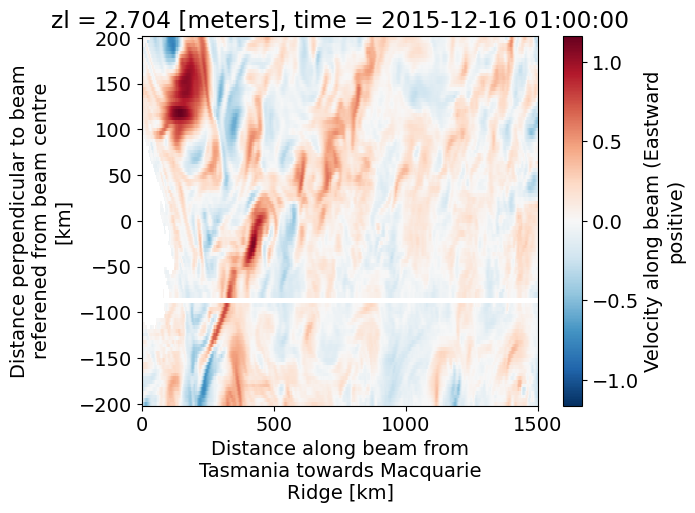

In [40]:
%matplotlib inline
culprit = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-20/output145/u/backup/*.nc")

plt.clf()
culprit.u.isel(time = 0,zl = 0).plot()
plt.show()

array([[[         nan,          nan,          nan,          nan,
                  nan,          nan,  55.14223508,  57.9587322 ,
         104.44097832, 117.84434152],
        [         nan,          nan,          nan,          nan,
                  nan,          nan,  73.03212999,  83.86884763,
         104.55400853, 118.37264243],
        [         nan,          nan,          nan,          nan,
                  nan,  71.96968736,  87.67506385,  91.91447921,
         105.32407581, 120.99367711],
        [         nan,          nan,          nan,          nan,
          63.07311916,  85.15865501,  91.71340742,  98.37176143,
         109.29369415, 121.02336556],
        [         nan,          nan,          nan,          nan,
          71.16329559,  87.59806393,  92.74514758,  99.58670547,
         112.8772086 , 124.19011426],
        [         nan,          nan,          nan,          nan,
          75.68408732,  90.18764063,  93.94795585, 102.37480506,
         116.49295394, 125.204

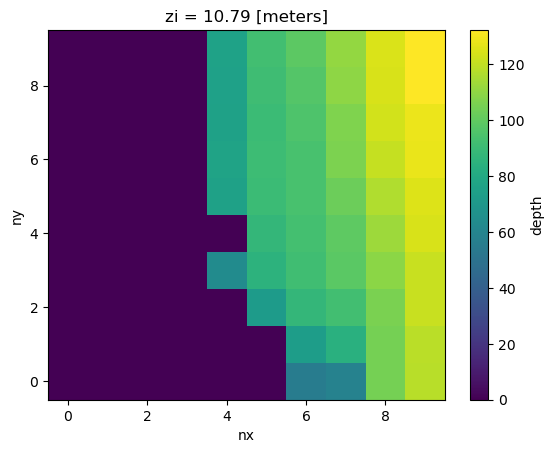

In [36]:
bathy = xr.open_dataset("/g/data/nm03/ab8992/ttide-inputs/full-20/topog_flattened.nc")

bathy.depth.where(np.abs(bathy.depth - t) > 0.01,0).isel(nx = slice(225,235),ny = slice(736,746)).plot()
# bathy.depth.isel(nx = slice(225,235),ny = slice(736,746)).plot()
bathy.depth.isel(nx = slice(225,235),ny = slice(736,746)).values

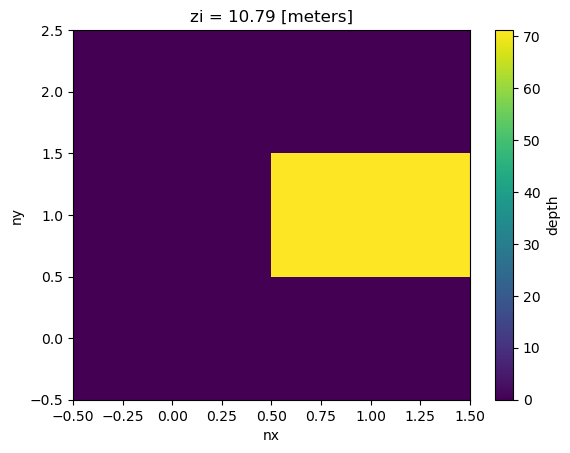

In [ ]:
t = 7.1163295587294130e+1
import numpy as np
bathy.depth.where(np.abs(bathy.depth - t) > 0.01,0).isel(nx = slice(228,230),ny = slice(739,742)).plot()

In [28]:
culprit_fixed = culprit.assign_coords(yb = true)
print(true - culprit_fixed.yb.values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [31]:
tt.save_chunked(
    culprit_fixed,
    "u",
    6,
    Path("/g/data/nm03/ab8992/outputs/full-20/output145")
)

In [7]:
save_vorticity("full-20","output*",recompute = True)

ValueError: Resulting object does not have monotonic global indexes along dimension yb